In [85]:
import pandas as pd

imdb_data_en = pd.read_csv("./Data/IMDB Dataset.csv")
imdb_data_en.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [86]:
# Shuffle the dataset in stratified mannerand keep only 5000 samples
imdb_data_en = imdb_data_en.sample(frac=1, random_state=42).reset_index(drop=True)
imdb_data_en = imdb_data_en[:5000]
imdb_data_en.head()

,review,sentiment
0,I really liked this Summerslam due to the look...,positive
1,Not many television shows appeal to quite as m...,positive
2,The film quickly gets to a major chase scene w...,negative
3,Jane Austen would definitely approve of this o...,positive
4,Expectations were somewhat high for me when I ...,negative


In [87]:
imdb_data_en.sentiment.value_counts()

positive    2519
negative    2481
Name: sentiment, dtype: int64

In [88]:
# save the excel file for translation
imdb_data_en.to_excel("./Data/IMDB Dataset.xlsx", index=False)

In [89]:
# load the spanish translated excel file
imdb_data_es = pd.read_excel("./Data/IMDB-Dataset-Spanish-Translated.xlsx")
# rename the columns revisión to review and sentimiento to sentiment
imdb_data_es.rename(columns={"revisión": "review", " sentimiento": "sentiment"}, inplace=True)
# rename the values positivo to positive and negativo to negative
imdb_data_es.sentiment = imdb_data_es.sentiment.apply(lambda x: "positive" if x == "positivo" else "negative")


In [90]:
imdb_data_es.head()

,review,sentiment
0,Realmente me gustó este Summerslam debido a la...,positive
1,No hay muchos programas de televisión que atra...,positive
2,La película llega rápidamente a una gran esce...,negative
3,¡Jane Austen definitivamente aprobaría este!<b...,negative
4,Las expectativas eran algo altas para mí cuand...,negative


In [91]:
# create a huggingface dataset from the dataframe imdb_data_en
from datasets import Dataset

dataset_en = Dataset.from_pandas(imdb_data_en)
dataset_en


Dataset({
    features: ['review', 'sentiment'],
    num_rows: 5000
})

In [92]:
# Load a multilingual model from Sentence Transformers and use it to encode all english sentences in the dataset
from sentence_transformers import SentenceTransformer

# model = SentenceTransformer("paraphrase-multilingual-MiniLM-L12-v2")
model = SentenceTransformer("distiluse-base-multilingual-cased-v1")

Downloading:   0%|          | 0.00/690 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/114 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.58M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.38k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/556 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/539M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/452 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/996k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/341 [00:00<?, ?B/s]

## Model Downloaded, Let's take it for a spin

In [93]:
# Lets consider one sentence from english dataset and encode it
sentence_0_english = dataset_en[0]["review"]
sentence_0_english

"I really liked this Summerslam due to the look of the arena, the curtains and just the look overall was interesting to me for some reason. Anyways, this could have been one of the best Summerslam's ever if the WWF didn't have Lex Luger in the main event against Yokozuna, now for it's time it was ok to have a huge fat man vs a strong man but I'm glad times have changed. It was a terrible main event just like every match Luger is in is terrible. Other matches on the card were Razor Ramon vs Ted Dibiase, Steiner Brothers vs Heavenly Bodies, Shawn Michaels vs Curt Hening, this was the event where Shawn named his big monster of a body guard Diesel, IRS vs 1-2-3 Kid, Bret Hart first takes on Doink then takes on Jerry Lawler and stuff with the Harts and Lawler was always very interesting, then Ludvig Borga destroyed Marty Jannetty, Undertaker took on Giant Gonzalez in another terrible match, The Smoking Gunns and Tatanka took on Bam Bam Bigelow and the Headshrinkers, and Yokozuna defended th

In [94]:
sentence_0_english_embedding = model.encode(sentence_0_english)
sentence_0_english_embedding.shape

(512,)

In [95]:
sentence_0_spanish = imdb_data_es["review"][0]
sentence_0_spanish

'Realmente me gustó este Summerslam debido a la apariencia de la arena, las cortinas y simplemente la apariencia general me resultó interesante por alguna razón. De todos modos, este podría haber sido uno de los mejores Summerslam de la historia si la WWF no hubiera tenido a Lex Luger en el evento principal contra Yokozuna, ahora es el momento, estaba bien tener un hombre gordo enorme contra un hombre fuerte, pero me alegro. los tiempos han cambiado. Fue un evento principal terrible al igual que cada partido en el que participa Luger es terrible. Otros combates en la cartelera fueron Razor Ramon vs Ted Dibiase, Steiner Brothers vs Heavenly Bodies, Shawn Michaels vs Curt Hening, este fue el evento en el que Shawn nombró a su gran monstruo de guardaespaldas Diesel, IRS vs 1-2-3 Kid, Bret Hart primero se enfrenta a Doink, luego a Jerry Lawler y las cosas con los Hart y Lawler siempre fueron muy interesantes, luego Ludvig Borga destruyó a Marty Jannetty, Undertaker se enfrentó a Giant Gonz

In [96]:
sentence_0_spanish_embedding = model.encode(sentence_0_spanish)
sentence_0_spanish_embedding.shape

(512,)

In [97]:
# Lets compute the cosine similarity between the two sentences
from sentence_transformers import util

print(f'Cosine Similarity between sentences in EN vs Spanish is {util.pytorch_cos_sim(sentence_0_english_embedding, sentence_0_spanish_embedding)[0][0]}')

Cosine Similarity between sentences in EN vs Spanish is 0.9477757215499878


In [98]:
# now lets compare the cosine similarity with a different spanish sentence this time and see the difference
sentence_1_spanish_2 = imdb_data_es["review"][1]
sentence_1_spanish_2

'No hay muchos programas de televisión que atraigan a tantos tipos diferentes de fanáticos como lo hace Farscape... Conozco a jóvenes y mayores de 30/40 años; fanáticos tanto masculinos como femeninos en tantos países diferentes como puedas pensar que simplemente adoran este televisor. mini series. Tiene elementos que se pueden encontrar en casi todos los demás programas de televisión, drama impulsado por personajes que podría ser de una telenovela australiana; ¡sin embargo, en el mismo episodio tiene ciencia ficción y realidad que haría que incluso el "Trekkie" más resistente corriera por su dinero en las apuestas de Brainbender! Teoría de agujeros de gusano, viaje en el tiempo en forma ecuacional verdadera... Magnífico. Abarca culturas de todo el mapa, ya que las posibilidades son infinitas al tener múltiples estrellas y, por lo tanto, miles de planetas para elegir.<br /><br />Con un alcance tan amplio; Se esperaría que nada fuera capaz de mantener la ilusión por mucho tiempo, pero a

In [99]:
# Now we encode the second spanish sentence and compute the cosine similarity
sentence_1_spanish_2_embedding = model.encode(sentence_1_spanish_2)
print(f'Cosine Similarity between sentences in EN vs Spanish is {util.pytorch_cos_sim(sentence_0_english_embedding, sentence_1_spanish_2_embedding)[0][0]}')

Cosine Similarity between sentences in EN vs Spanish is 0.06476996839046478


 See we are now able to compute the cosine similarity between the english and spanish sentences and the similarity is much lower than before as the sentences are not similar in meaning.

 With this hypothesis we can now use the model to find similar sentences in a corpus of documents. We will encode all english sentences in the corpus and then compute the cosine similarity between the english and spanish sentences.
 
  The top 5 sentences with the highest similarity will be the most similar sentences in the corpus and we can observe their labels to label any unseen spanish sentence.

In [100]:
# Lets encode all the english sentences in the dataset, we can leverage the map function of the datasets for efficient encoding
def embed(x):
    return {"embedding": model.encode(x["review"]) }

dataset_en_embeddings = dataset_en.map(embed, batched=True, remove_columns=dataset_en.column_names)
# We can now add these embeddings to the dataset as FAISS index, which again is an inbuilt function of the datasets library
dataset_en_embeddings.add_faiss_index("embedding")

  0%|          | 0/5 [00:00<?, ?ba/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Dataset({
    features: ['embedding'],
    num_rows: 5000
})

In [101]:
# Lets encode all the english sentences in the dataset, we can leverage the map function of the datasets for efficient encoding
def embed(x):
    return {"embedding": model.encode(x["review"]) }

dataset_en_embeddings = dataset_en.map(embed, batched=True)
# We can now add these embeddings to the dataset as FAISS index, which again is an inbuilt function of the datasets library
dataset_en_embeddings.add_faiss_index("embedding")

  0%|          | 0/5 [00:00<?, ?ba/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Dataset({
    features: ['review', 'sentiment', 'embedding'],
    num_rows: 5000
})

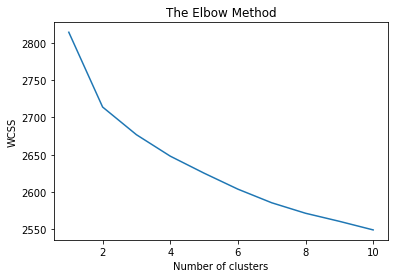

In [102]:
# Lets cluster the encodings to reduce the search space
from sklearn.cluster import KMeans

# find K using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init="k-means++", random_state=42)
    kmeans.fit(dataset_en_embeddings["embedding"])
    wcss.append(kmeans.inertia_)

import matplotlib.pyplot as plt

plt.plot(range(1, 11), wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [103]:
k = 4
kmeans = KMeans(n_clusters=k, init="k-means++", random_state=42)
kmeans.fit(dataset_en_embeddings["embedding"])

KMeans(n_clusters=4, random_state=42)

In [104]:
# Create a new column in the dataset to store the cluster number
dataset_en_embeddings = dataset_en_embeddings.add_column("cluster", kmeans.labels_)
dataset_en_embeddings

Dataset({
    features: ['review', 'sentiment', 'embedding', 'cluster'],
    num_rows: 5000
})

In [106]:
# Get the centroids of the clusters
centroids = kmeans.cluster_centers_
centroids.shape

(4, 512)

In [107]:
# Create a dataset for spanish and add the FAISS index
dataset_es = Dataset.from_pandas(imdb_data_es)
dataset_es_embeddings = dataset_es.map(embed, batched=True)
dataset_es_embeddings.add_faiss_index("embedding")

  0%|          | 0/5 [00:00<?, ?ba/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Dataset({
    features: ['review', 'sentiment', 'embedding'],
    num_rows: 5000
})

In [108]:
dataset_es_embeddings

Dataset({
    features: ['review', 'sentiment', 'embedding'],
    num_rows: 5000
})

In [109]:
centroids

array([[-2.17171507e-03, -2.81947990e-02,  1.87627010e-03, ...,
        -4.12376314e-02, -5.77080499e-03,  3.76874454e-03],
       [-1.72947080e-02, -1.99171659e-02,  6.08114652e-03, ...,
        -3.16915819e-02, -2.45654490e-03,  4.95425803e-03],
       [-1.81260843e-02, -2.06559229e-02, -1.78011764e-03, ...,
        -3.00500904e-02, -8.31573944e-03,  1.50944642e-05],
       [-1.11392576e-02, -9.83898011e-03,  1.36803467e-02, ...,
        -2.49205387e-02, -4.17167805e-03,  3.01958475e-03]])

In [135]:
import numpy as np
from collections import Counter


# Create a function for the above 
def get_nearest_examples(query, k=5,centroids=centroids,debug=True):
    query_embedding =  np.array(query["embedding"], dtype=np.float32)
    # We will first get the closest centroid and then get the nearest examples in the cluster
    centroids = centroids.astype("float32")
    centroid_distances = util.pytorch_cos_sim(query_embedding, centroids)[0]
    closest_centroid = np.argsort(centroid_distances)[0]
    # Get the nearest examples in the cluster
    # Filter the dataset by cluster label and then get the nearest examples
    dataset_cluster = dataset_en_embeddings.filter(lambda x: x["cluster"] == closest_centroid)
    if debug:
        print(dataset_cluster.shape)
    dataset_cluster.add_faiss_index("embedding")
    scores, samples = dataset_cluster.get_nearest_examples("embedding", query_embedding, k=k)
    # scores, samples = dataset_en_embeddings.get_nearest_examples("embedding", query_embedding, k=k)
    if debug:
        print(f"QUERY LABELS: {query['sentiment']}")
        print(f"QUERY TEXT:\n{query['review'][:200]} [...]\n")
        print("="*50)
        print(f"Retrieved documents:")
        for score, label, text in zip(scores, samples["sentiment"], samples["review"]):
            print("="*50)
            print(f"TEXT:\n{text[:200]} [...]")
            print(f"SCORE: {score:.2f}")
            print(f"LABELS: {label}")
    # Selected label is most occuring string sentiment in the retrieved documents
    counts = Counter(samples["sentiment"])
    selected_label = counts.most_common(1)[0][0]
    if debug:
        print("="*50)
        print(f"SELECTED LABEL: {selected_label}")
    return selected_label
    
predicted_label = get_nearest_examples(dataset_es_embeddings[10])

  0%|          | 0/5 [00:00<?, ?ba/s]

(1079, 4)


  0%|          | 0/2 [00:00<?, ?it/s]

QUERY LABELS: negative
QUERY TEXT:
 Dios, esto fue inmensamente aburrido. el protagonista (Christian Schoyen) tiene que ser el peor actor que he visto en mi vida. y otra cosa, si el personaje de la película se mudara a Estados Unidos c [...]

Retrieved documents:
TEXT:
... when dubbed into another language. Let's face it: Neither Nielsen nor Schwarzenegger are really good actors when it comes to dialog. And given the campy lines they are supposed to utter this is a  [...]
SCORE: 0.78
LABELS: negative
TEXT:
This TVM seems to have polarised opinions amongst the commentators on this page so perhaps I can settle everything by saying this is a very stupid not very well made television movie . How bad is it ? [...]
SCORE: 0.83
LABELS: negative
TEXT:
It's the single unfunniest thing I ever watched. It's sad how he tries so hard to come up with a good joke and all he does is curse and thinks his disgusting vulgarity is funny. He is the most bitter  [...]
SCORE: 0.85
LABELS: negative
TEXT:
Cusa

In [119]:
predicted_label = get_nearest_examples(dataset_es_embeddings[12],k=3)

  0%|          | 0/5 [00:00<?, ?ba/s]

(1079, 4)


  0%|          | 0/2 [00:00<?, ?it/s]

QUERY LABELS: negative
QUERY TEXT:
 Se hizo en 2007 y el CG es malo para una película hecha en 1998. En una parte de la película hay una toma en stop motion de un dinosaurio que en realidad se ve bien, pero esto solo hace que el trabaj [...]

Retrieved documents:
TEXT:
I remember watching ATTACK when it first came out and caught it again recently. The sci fi channel has run worse, but not by much. A shameless ripoff of Jurassic Park, ATTACK substitutes sabertooth ca [...]
SCORE: 0.67
LABELS: negative
TEXT:
I saw this series in 1999 in London TV and was blown away. Like another user commented - This is what i would have liked to see when i first watched "Jurassic Park" - Life and death of Dinosaurs in th [...]
SCORE: 0.75
LABELS: positive
TEXT:
OH MY GOD! After having such a promising start, Critters 2 reiterated the Karmic rule of what goes around comes around. Clearly, very few things were thought out when this movie was made, and what was [...]
SCORE: 0.83
LABELS: negative
SELECTED L

In [134]:
# Calculate the accuracy of the prediction
def get_accuracy(dataset_es_embeddings):
    correct = 0
    for i in range(len(dataset_es_embeddings)):
        predicted_label = get_nearest_examples(dataset_es_embeddings[i],k=3,debug=False)
        if predicted_label == dataset_es_embeddings[i]["sentiment"]:
            correct += 1
    return correct/len(dataset_es_embeddings)

# Drop the FAISS index
# dataset_es_embeddings.drop_index("embedding")
# Get 100 rows from the dataset
dataset_es_embeddings_100 = dataset_es_embeddings.select(range(100))
# Add the index to the dataset
dataset_es_embeddings_100.add_faiss_index("embedding")
print(f'Accuracy :{get_accuracy(dataset_es_embeddings_100)}')


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Accuracy :0.67
